## Gold Price Prediction 
<p><img src="datasets/dataset-cover.jpg" alt="Project Gold Price Prediction " width="600px"></p>

### Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import *
from wordcloud import *
from sklearn import *
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import *
from sklearn.tree import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import *
from sklearn.metrics import *
%matplotlib inline

### Preparing Our Dataset

In [2]:
df_gold=pd.read_csv('datasets/gold_price_dataset.csv')
df_gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### Preprocessing

In [3]:
df_gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [4]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df_gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df_gold.shape

(2290, 6)

In [7]:
df_gold.drop('Date',axis=1,inplace=True)

In [8]:
df_gold.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


### Correlation & Vizualizing the Data

In [9]:
cor=df_gold.corr()
cor

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

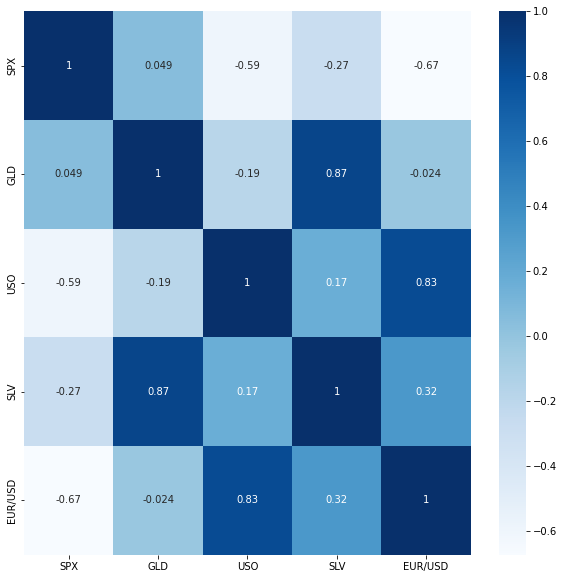

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, cmap='Blues')

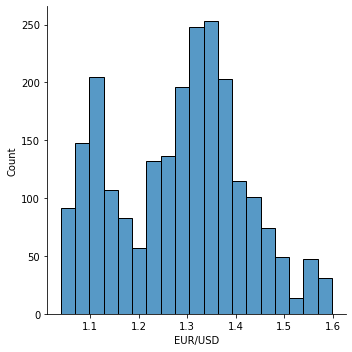

In [11]:
sns.displot(x='EUR/USD',data=df_gold)

e:\programs\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

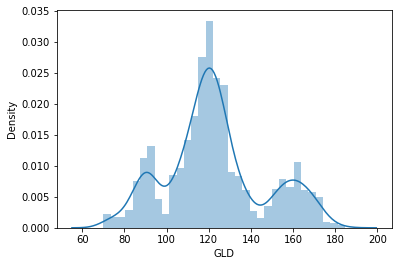

In [12]:
sns.distplot(df_gold['GLD'])

### Spliting The Data

In [13]:
X,Y=df_gold.drop('GLD',axis=1),df_gold['GLD']
display(X.head())
display(Y.head())

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

### Building the Model

In [15]:
RF=RandomForestRegressor(n_estimators=100)
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [16]:
test_prediction=RF.predict(X_test)
test_prediction

array([154.37070196,  92.69949964, 160.92359987, 164.76130184,
       120.41410048, 118.0373011 , 136.27229703, 154.71040116,
       171.66290199, 148.96089887, 165.51500248, 130.61360019,
       155.0635025 , 113.43920038, 146.17870032, 114.42659916,
       119.03929886, 171.01679781,  83.86699897, 113.61920009,
       159.70400074, 126.93690099, 155.01410165, 127.34609829,
       118.15529995,  90.96979924, 125.93019897, 124.33409959,
       115.34740003, 123.46229935, 116.68800047, 167.98349914,
        86.95359853, 150.65609732, 150.53450188, 120.13349951,
       167.46079965, 119.84180083, 120.10279979, 123.9262001 ,
       120.9895995 , 118.44010013, 110.04249866, 151.26300111,
       152.58480065, 108.90829953,  93.77999925,  94.45070045,
        72.81630003, 112.19079999, 135.10539806, 130.18309864,
       167.90899831, 115.43159954, 124.98070081,  90.91590016,
       153.00019967, 124.32199995,  92.54659906, 125.96919821,
       117.52140083, 127.0267991 ,  74.72350143, 145.94

In [17]:
error = metrics.r2_score(Y_test, test_prediction)
print(f"R squared score : {error*100:.2f} %")

R squared score : 98.73 %


In [18]:
l=list(Y_test)
l

[152.690002,
 91.169998,
 162.699997,
 165.880005,
 120.989998,
 117.580002,
 132.869995,
 159.669998,
 173.610001,
 150.559998,
 166.830002,
 130.100006,
 155.130005,
 115.540001,
 146.539993,
 113.889999,
 119.309998,
 160.639999,
 78.389999,
 113.779999,
 162.190002,
 126.989998,
 154.470001,
 127.480003,
 117.209999,
 91.029999,
 124.150002,
 123.650002,
 114.459999,
 123.620003,
 116.099998,
 167.119995,
 88.379997,
 150.990005,
 147.179993,
 120.139999,
 168.789993,
 121.190002,
 122.290001,
 123.599998,
 120.949997,
 118.300003,
 109.589996,
 153.339996,
 151.589996,
 110.830002,
 93.860001,
 93.400002,
 72.220001,
 112.970001,
 135.520004,
 132.210007,
 169.539993,
 114.43,
 124.599998,
 91.730003,
 157.199997,
 123.779999,
 91.18,
 126.010002,
 119.669998,
 128.110001,
 78.849998,
 146.589996,
 122.019997,
 151.619995,
 75.5,
 108.769997,
 120.360001,
 108.410004,
 154.570007,
 92.290001,
 118.43,
 118.970001,
 132.490005,
 134.910004,
 127.580002,
 119.349998,
 118.769997,
 1

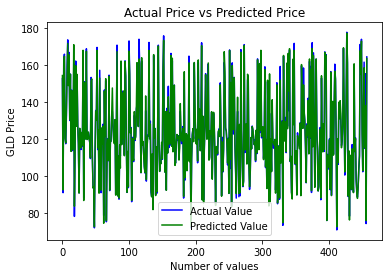

In [19]:
plt.plot(l, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()